Perry Fox 6/26/23

# Sea Level Predictor

"You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050."

This notebook was created first and then adapted to the Replit Python file for unit testing and submission:
https://replit.com/@Pyrus277/boilerplate-sea-level-predictor#sea_level_predictor.py

## Data description
- Rows: Years (1880-2013)
- Cols: Sea level measurements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('epa-sea-level.csv')

In [3]:
df.shape

(134, 5)

In [4]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
df.isnull().sum()

Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64

We've got nulls for that one column, are the consecutive for the first 113 rows?
...yes. Doesn't matter for this analysis though, that's not the sea level column we're using. 

In [6]:
df['NOAA Adjusted Sea Level'].iloc[0:113].isnull().sum()

113

In [7]:
# Any duplicates? No.
df.duplicated()[df.duplicated() == True].count()

0

In [8]:
# what's the numeric spread?
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


Use `matplotlib` to create a scatter plot using the `Year` column as the x-axis, and the `CSIR0 Adjusted Sea Level` column as the y-axis.

<function matplotlib.pyplot.show(close=None, block=None)>

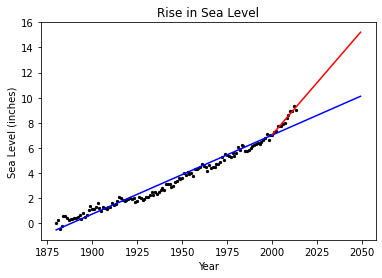

In [14]:
# Plot the basic sea level scatter plot from 1880 to 2013
fig, ax = plt.subplots()
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
plt.scatter(x, y, s=5, c='black')

# Make the regression line object, fit to the scatterplot data
res = linregress(x,y)
# Make a series to extend the x-axis out to 2050
x_forecast = pd.Series([i for i in range(1880,2051)])
# Plot the best fit line on this extended axis. res contains slope and int attributes
# Notice the second argument here is y = mx+b.
plt.plot(x_forecast, res.intercept+res.slope*x_forecast, 'b')

# Make another regression line object, this time fit to the data for 2000 onwards
x_recent = df[df['Year'] >= 2000].Year
y_recent = df[df['Year'] >= 2000]['CSIRO Adjusted Sea Level']
res_recent = linregress(x_recent, y_recent)

# Set up the plotting for this line
x_forecast2000 = pd.Series([i for i in range(2000,2051)])
plt.plot(x_forecast2000, res_recent.intercept+res_recent.slope*x_forecast2000, 'r')

# Labeling is important
ax.set_title('Rise in Sea Level')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
plt.show